In [2]:
import operator
from math import log
from collections import Counter

In [3]:
def calcShannonEnt(dataSet):
    # 求list的长度，表示计算参与训练的数据量
    numEntries = len(dataSet)
    # 计算分类标签label出现的次数
    labelCounts = {}
    # the the number of unique elements and their occurrence
    for featVec in dataSet:
        # 将当前实例的标签存储，即每一行数据的最后一个数据代表的是标签
        currentLabel = featVec[-1]
        # 为所有可能的分类创建字典，如果当前的键值不存在，则扩展字典并将当前键值加入字典。每个键值都记录了当前类别出现的次数。
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
    print(labelCounts)
    # 对于 label 标签的占比，求出 label 标签的香农熵
    shannonEnt = 0.0
    for key in labelCounts:
        # 使用所有类标签的发生频率计算类别出现的概率。
        prob = float(labelCounts[key])/numEntries
        # 计算香农熵，以 2 为底求对数
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt

In [4]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
            [1, 1, 'yes'],
            [1, 0, 'no'],
            [0, 1, 'no'],
            [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    return dataSet, labels

In [5]:
myDat,labels=createDataSet()

In [6]:
calcShannonEnt(myDat)

{'yes': 2, 'no': 3}


0.9709505944546686

In [7]:
def createDataSet():
    dataSet = [[1, 1, 'maybe'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing', 'flippers']
    # 返回
    return dataSet, labels

In [8]:
myDat,labels=createDataSet()

In [9]:
calcShannonEnt(myDat)

{'maybe': 1, 'yes': 1, 'no': 3}


1.3709505944546687

In [17]:
def splitDataSet(dataSet, index, value):
    retDataSet = []
    for featVec in dataSet: 
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        print("featVec=%s" %featVec)
        if featVec[index] == value:
            # chop out index used for splitting
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index] 
            print("reducedFeatVec=%s"%reducedFeatVec)
            print(featVec[index+1:])
            reducedFeatVec.extend(featVec[index+1:])
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [18]:
splitDataSet(myDat,0,0)

featVec=[1, 1, 'maybe']
featVec=[1, 1, 'yes']
featVec=[1, 0, 'no']
featVec=[0, 1, 'no']
reducedFeatVec=[]
[1, 'no']
featVec=[0, 1, 'no']
reducedFeatVec=[]
[1, 'no']


[[1, 'no'], [1, 'no']]

In [20]:
splitDataSet(myDat,0,1)

featVec=[1, 1, 'maybe']
reducedFeatVec=[]
[1, 'maybe']
featVec=[1, 1, 'yes']
reducedFeatVec=[]
[1, 'yes']
featVec=[1, 0, 'no']
reducedFeatVec=[]
[0, 'no']
featVec=[0, 1, 'no']
featVec=[0, 1, 'no']


[[1, 'maybe'], [1, 'yes'], [0, 'no']]

In [ ]:
def chooseBestFeatureToSplit(dataSet):
    """chooseBestFeatureToSplit(选择最好的特征)

    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # 数据集的原始信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取对应的feature下的所有数据
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            # 计算概率
            prob = len(subDataSet)/float(len(dataSet))
            # 计算信息熵
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        print 'infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [21]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    # 如果数据集的最后一列的第一个值出现的次数=整个集合的数量，也就说只有一个类别，就只直接返回结果就行
    # 第一个停止条件：所有的类标签完全相同，则直接返回该类标签。
    # count() 函数是统计括号中的值在list中出现的次数
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 如果数据集只有1列，那么最初出现label次数最多的一类，作为结果
    # 第二个停止条件：使用完了所有特征，仍然不能将数据集划分成仅包含唯一类别的分组。
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)

    # 选择最优的列，得到最优列对应的label含义
    bestFeat = chooseBestFeatureToSplit(dataSet)
    # 获取label的名称
    bestFeatLabel = labels[bestFeat]
    # 初始化myTree
    myTree = {bestFeatLabel: {}}
    # 注：labels列表是可变对象，在PYTHON函数中作为参数时传址引用，能够被全局修改
    # 所以这行代码导致函数外的同名变量被删除了元素，造成例句无法执行，提示'no surfacing' is not in list
    del(labels[bestFeat])
    # 取出最优列，然后它的branch做分类
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        # 求出剩余的标签label
        subLabels = labels[:]
        # 遍历当前选择特征包含的所有属性值，在每个数据集划分上递归调用函数createTree()
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        # print 'myTree', value, myTree
    return myTree

In [27]:
def chooseBestFeatureToSplit(dataSet):
    """chooseBestFeatureToSplit(选择最好的特征)

    Args:
        dataSet 数据集
    Returns:
        bestFeature 最优的特征列
    """
    # 求第一行有多少列的 Feature, 最后一列是label列嘛
    numFeatures = len(dataSet[0]) - 1
    # 数据集的原始信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    # iterate over all the features
    for i in range(numFeatures):
        # create a list of all the examples of this feature
        # 获取对应的feature下的所有数据
        featList = [example[i] for example in dataSet]
        # get a set of unique values
        # 获取剔重后的集合，使用set对list数据进行去重
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            # 计算概率
            prob = len(subDataSet)/float(len(dataSet))
            # 计算信息熵
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        if (infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [28]:
import os
file="data/lenses.txt";
fr=open(file)
linese=[insit.strip().split("\t") for insit in fr.readlines()]
lineseLables=['age','prescript','astigmatic','tearRate']
lineseTree=createTree(linese,lineseLables)


{'no lenses': 15, 'soft': 5, 'hard': 4}
featVec=['young', 'myope', 'no', 'reduced', 'no lenses']
featVec=['young', 'myope', 'no', 'normal', 'soft']
featVec=['young', 'myope', 'yes', 'reduced', 'no lenses']
featVec=['young', 'myope', 'yes', 'normal', 'hard']
featVec=['young', 'hyper', 'no', 'reduced', 'no lenses']
featVec=['young', 'hyper', 'no', 'normal', 'soft']
featVec=['young', 'hyper', 'yes', 'reduced', 'no lenses']
featVec=['young', 'hyper', 'yes', 'normal', 'hard']
featVec=['pre', 'myope', 'no', 'reduced', 'no lenses']
featVec=['pre', 'myope', 'no', 'normal', 'soft']
featVec=['pre', 'myope', 'yes', 'reduced', 'no lenses']
featVec=['pre', 'myope', 'yes', 'normal', 'hard']
featVec=['pre', 'hyper', 'no', 'reduced', 'no lenses']
featVec=['pre', 'hyper', 'no', 'normal', 'soft']
featVec=['pre', 'hyper', 'yes', 'reduced', 'no lenses']
featVec=['pre', 'hyper', 'yes', 'normal', 'no lenses']
featVec=['presbyopic', 'myope', 'no', 'reduced', 'no lenses']
reducedFeatVec=[]
['myope', 'no', 're

In [29]:
lineseTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'presbyopic': {'prescript': {'hyper': 'soft',
        'myope': 'no lenses'}},
      'young': 'soft',
      'pre': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'presbyopic': 'no lenses',
        'young': 'hard',
        'pre': 'no lenses'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

In [31]:
import decisionTreePlot

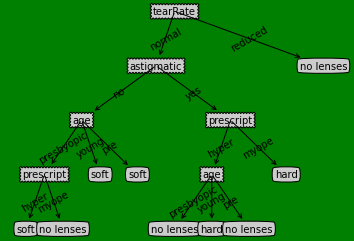

In [32]:
decisionTreePlot.createPlot(lineseTree)